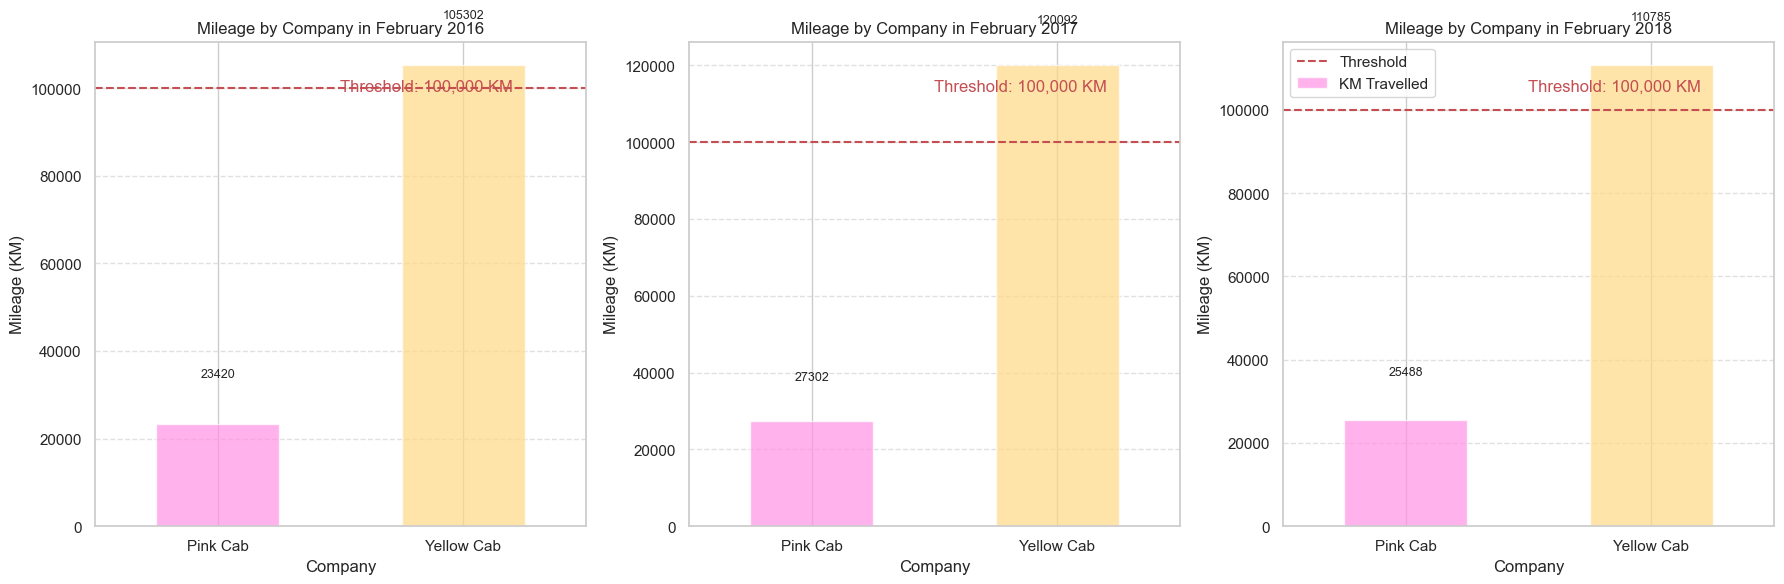

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV file into a DataFrame
df = pd.read_csv('Cab_Data.csv')

# Calculating the Date of Travel from the numeric value
df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['Date of Travel'], unit='D')

# Filtering data for February in 2016, 2017, and 2018
february_2016_data = df[(df['Date of Travel'].dt.year == 2016) & (df['Date of Travel'].dt.month == 2)]
february_2017_data = df[(df['Date of Travel'].dt.year == 2017) & (df['Date of Travel'].dt.month == 2)]
february_2018_data = df[(df['Date of Travel'].dt.year == 2018) & (df['Date of Travel'].dt.month == 2)]

# Calculating mileage for each company for each year
mileage_2016 = february_2016_data.groupby('Company')['KM Travelled'].sum()
mileage_2017 = february_2017_data.groupby('Company')['KM Travelled'].sum()
mileage_2018 = february_2018_data.groupby('Company')['KM Travelled'].sum()

# Set Seaborn style
sns.set(style="whitegrid")

# Set up subplots as a single row with three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a color palette
colors = ['#ff92e4', '#fed983']

# Create a list of years
years = [2016, 2017, 2018]

# Create subplots for each year
for i, year in enumerate(years):
    # Filter the data for February of the current year
    filtered_df = df[(df['Date of Travel'].dt.year == year) & (df['Date of Travel'].dt.month == 2)]

    # Grouping the filtered data by Company and sum the Cost of Trip
    company_mileage = filtered_df.groupby("Company")["KM Travelled"].sum()

    # Plotting each year's data on a single bar subplot
    company_mileage.plot(kind="bar", color=colors, alpha=0.7, ax=axes[i])

    # Add a title and labels
    axes[i].set_title(f"Mileage by Company in February {year}")
    axes[i].set_xlabel("Company")
    axes[i].set_ylabel("Mileage (KM)")
    axes[i].tick_params(axis='x', rotation=0)

    # Add grid lines for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

    # Adding data labels above each bar for clarity
    for x, y in enumerate(company_mileage):
        axes[i].text(x, y + 10000, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

    # Adjust the threshold value to 100,000 kilometers
    threshold_value = 100000
    # Add a horizontal line for the threshold value
    axes[i].axhline(y=threshold_value, color='r', linestyle='--', label='Threshold')

    # Add a text annotation
    axes[i].text(0.5, 0.9, f'Threshold: {threshold_value:,.0f} KM', transform=axes[i].transAxes, color='r')

# Adjust layout to fit all graphs on one line
plt.tight_layout()
plt.legend()  # Add legend
plt.show()
